In [10]:
normal_ic = [] 
for i in range(995):
    normal_ic.append({
        'time':i+100,
        'mom':pearsonr(moms[-(1000-i)],rts[-(1000-i)])[0],
        'vol':pearsonr(vols[-(1000-i)],rts[-(1000-i)])[0],
        'max52':pearsonr(max52s[-(1000-i)],rts[-(1000-i)])[0],
        'min52':pearsonr(min52s[-(1000-i)],rts[-(1000-i)])[0],
        'cci':pearsonr(ccis[-(1000-i)],rts[-(1000-i)])[0],
        'K':pearsonr(Ks[-(1000-i)],rts[-(1000-i)])[0],
        'D':pearsonr(Ds[-(1000-i)],rts[-(1000-i)])[0],
        'J':pearsonr(Js[-(1000-i)],rts[-(1000-i)])[0],
        'rsi':pearsonr(rsis[-(1000-i)],rts[-(1000-i)])[0],
        'trix':pearsonr(trixs[-(1000-i)],rts[-(1000-i)])[0],
        'willr':pearsonr(willrs[-(1000-i)],rts[-(1000-i)])[0],
        'macd':pearsonr(macds[-(1000-i)],rts[-(1000-i)])[0],
        'natr':pearsonr(natrs[-(1000-i)],rts[-(1000-i)])[0],
    })
normalic_df = pd.DataFrame(normal_ic)

IndexError: list index out of range

In [86]:
rank_ic = []
for i in range(995):
    rank_ic.append({
        'time':i+100,
        'mom':spearmanr(moms[-(1000-i)],rts[-(1000-i)])[0],
        'vol':spearmanr(vols[-(1000-i)],rts[-(1000-i)])[0],
        'max52':spearmanr(max52s[-(1000-i)],rts[-(1000-i)])[0],
        'min52':spearmanr(min52s[-(1000-i)],rts[-(1000-i)])[0],
        'cci':spearmanr(ccis[-(1000-i)],rts[-(1000-i)])[0],
        'K':spearmanr(Ks[-(1000-i)],rts[-(1000-i)])[0],
        'D':spearmanr(Ds[-(1000-i)],rts[-(1000-i)])[0],
        'J':spearmanr(Js[-(1000-i)],rts[-(1000-i)])[0],
        'rsi':spearmanr(rsis[-(1000-i)],rts[-(1000-i)])[0],
        'trix':spearmanr(trixs[-(1000-i)],rts[-(1000-i)])[0],
        'willr':spearmanr(willrs[-(1000-i)],rts[-(1000-i)])[0],
        'macd':spearmanr(macds[-(1000-i)],rts[-(1000-i)])[0],
        'natr':spearmanr(natrs[-(1000-i)],rts[-(1000-i)])[0],
    })
rankic_df = pd.DataFrame(rank_ic)

In [2]:
import pandas as pd 
import numpy as np
from utils import *
import time
from scipy.stats import pearsonr, spearmanr


In [6]:
df1 = pd.read_csv("./data/CONTEST_DATA_IN_SAMPLE_1.csv",header=None)
df1.columns = ['time','stkcd','open','high','low','close','volume']
df2 = pd.read_csv("./data/CONTEST_DATA_IN_SAMPLE_2.csv",header=None)
df2.columns = ['time','stkcd','open','high','low','close','volume']
df2['time']=df2['time']+1100
df=pd.concat([df1,df2],axis=0)
df.to_csv('./data/contest_data_all.csv')

,time,stkcd,open,high,low,close,volume
0,0,1000,19.96632,19.96632,19.06278,19.18884,299216
1,0,1001,33.59400,33.59400,33.59400,33.59400,0
2,0,1002,84.11766,84.76446,81.01170,84.50574,233872
3,0,1003,5.54400,5.54400,5.27340,5.27340,19200
4,0,1004,198.46200,203.41200,195.69000,203.41200,6736
...,...,...,...,...,...,...,...
386095,1099,1346,46.26732,48.90600,46.26732,48.90600,4544
386096,1099,1347,68.50140,69.43200,68.50140,69.43200,2400
386097,1099,1348,238.55700,241.23660,238.26000,238.49100,6800
386098,1099,1349,139.30620,141.66240,139.30620,141.17400,2288


In [6]:
df=pd.read_csv('./data/contest_data_all.csv',index_col=0)
df

,time,stkcd,open,high,low,close,volume
0,0,1000,19.96632,19.96632,19.06278,19.18884,299216
1,0,1001,33.59400,33.59400,33.59400,33.59400,0
2,0,1002,84.11766,84.76446,81.01170,84.50574,233872
3,0,1003,5.54400,5.54400,5.27340,5.27340,19200
4,0,1004,198.46200,203.41200,195.69000,203.41200,6736
...,...,...,...,...,...,...,...
280795,1899,1346,12.71160,12.71160,12.71160,12.71160,0
280796,1899,1347,141.97920,141.97920,141.97920,141.97920,0
280797,1899,1348,411.10740,412.20960,403.70880,410.17680,9200
280798,1899,1349,149.75400,149.75400,145.44420,145.44420,0


In [17]:
days=df['time'].unique()
stocks=df['stkcd'].unique()

In [7]:
close_df = pd.DataFrame()
high_df = pd.DataFrame()
low_df = pd.DataFrame()
volume_df = pd.DataFrame()
for sub_df in df.groupby('stkcd'):
    close_df[sub_df[0]] = sub_df[1].reset_index().close
    high_df[sub_df[0]] = sub_df[1].reset_index().high
    low_df[sub_df[0]] = sub_df[1].reset_index().low
    volume_df[sub_df[0]] = sub_df[1].reset_index().volume
highs = high_df.values
lows = low_df.values
closes = close_df.values
volumes = volume_df.values

horizon = 1
rts = close_df.pct_change(horizon).shift(-horizon-1).values # returns

In [36]:
print(closes.shape,rts.shape,avgs.shape)

(1900, 351) (1900, 351) (1900, 351)


In [8]:
avgs = np.empty((0,closes.shape[1]))
moms = np.empty((0,closes.shape[1]))
vols = np.empty((0,closes.shape[1]))
max52s = np.empty((0,closes.shape[1]))
min52s = np.empty((0,closes.shape[1]))
ccis = np.empty((0,closes.shape[1]))
Ks = np.empty((0,closes.shape[1]))
Ds = np.empty((0,closes.shape[1]))
Js = np.empty((0,closes.shape[1]))
rsis = np.empty((0,closes.shape[1]))
trixs = np.empty((0,closes.shape[1]))
willrs = np.empty((0,closes.shape[1]))
macds = np.empty((0,closes.shape[1]))
natrs = np.empty((0,closes.shape[1]))
mfis = np.empty((0,closes.shape[1]))
start = time.time()
for i in range(1,len(closes)+1):
    c = closes[:i]
    h = highs[:i]
    l = lows[:i]
    v = volumes[:i]
    avg=get_avg(c,3)
    mom=get_mom(c,5)
    vol=get_vol(c,5)
    max52=get_52weekhigh(c)
    min52=get_52weeklow(c)
    cci = get_cci(h,l,c)
    K,D,J = get_kdj(h,l,c)
    rsi = get_rsi(c)
    trix = get_trix(c)
    willr = get_willr(h,l,c)
    macd = get_macd(c)
    natr = get_natr(h,l,c)
    mfi = get_mfi(c,h,l,v)

    avgs=np.vstack([avgs,avg])
    moms=np.vstack([moms,mom])
    vols=np.vstack([vols,vol])
    max52s=np.vstack([max52s,max52])
    min52s=np.vstack([min52s,min52])
    ccis=np.vstack([ccis,cci])
    Ks=np.vstack([Ks,K])
    Ds=np.vstack([Ds,D])
    Js=np.vstack([Js,J])
    rsis=np.vstack([rsis,rsi])
    trixs=np.vstack([trixs,trix])
    willrs=np.vstack([willrs,willr])
    macds=np.vstack([macds,macd])
    natrs=np.vstack([natrs,natr])
    mfis=np.vstack([mfis,mfi])
    if i%100 == 0:
        print(i)
endtime = time.time()
# print((start-endtime)*1000 / 1900)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [38]:
factors=pd.DataFrame()
factors['avgs']=pd.DataFrame(avgs,columns=stocks).stack()
factors['moms']=pd.DataFrame(moms,columns=stocks).stack()
factors['vols']=pd.DataFrame(vols,columns=stocks).stack()
factors['max52s']=pd.DataFrame(max52s,columns=stocks).stack()
factors['min52s']=pd.DataFrame(min52s,columns=stocks).stack()
factors['ccis']=pd.DataFrame(ccis,columns=stocks).stack()
factors['Ks']=pd.DataFrame(Ks,columns=stocks).stack()
factors['Ds']=pd.DataFrame(Ds,columns=stocks).stack()
factors['Js']=pd.DataFrame(Js,columns=stocks).stack()
factors['rsis']=pd.DataFrame(rsis,columns=stocks).stack()
factors['trixs']=pd.DataFrame(trixs,columns=stocks).stack()
factors['willrs']=pd.DataFrame(willrs,columns=stocks).stack()
factors['macds']=pd.DataFrame(macds,columns=stocks).stack()
factors['natrs']=pd.DataFrame(natrs,columns=stocks).stack()
factors['mfis']=pd.DataFrame(mfis,columns=stocks).stack()

factors['closes']=pd.DataFrame(closes,columns=stocks).stack()
factors['rts']=pd.DataFrame(rts,columns=stocks).stack()

factors.index=factors.index.set_names(['date','asset'])
factors

avgs      moms      vols    max52s    min52s        ccis  \
date asset                                                                 
0    1000     0.0000  0.000000  0.000000  0.000000  0.000000    0.000000   
     1001     0.0000  0.000000  0.000000  0.000000  0.000000    0.000000   
     1002     0.0000  0.000000  0.000000  0.000000  0.000000    0.000000   
     1003     0.0000  0.000000  0.000000  0.000000  0.000000    0.000000   
     1004     0.0000  0.000000  0.000000  0.000000  0.000000    0.000000   
...              ...       ...       ...       ...       ...         ...   
1899 1346    12.6500  0.997068  0.017432 -0.472039  0.139645   13.579067   
     1347   143.2442  0.998287  0.018120 -0.027003  0.195111   22.409361   
     1348   407.6996  1.001224  0.013452 -0.095555  0.162101 -122.489152   
     1349   147.6794  0.988371  0.022686 -0.316322  0.303733 -465.203520   
     1350   886.2480  0.980110  0.024560 -0.135262  0.987595  485.754924   

                   Ks         Ds          Js       rsis     trixs     willrs  \
date asset                                                                     
0    1000    0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
     1001    0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
     1002    0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
     1003    0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
     1004    0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   
...               ...        ...         ...        ...       ...        ...   
1899 1346   15.661939  35.423964   74.948016  47.312634 -0.451021  66.304348   
     1347   62.130479  60.983690   58.690112  42.532678  0.298771  49.495677   
     1348   58.353317  68.083986   87.545322  34.675327 -0.130823  28.946617   
     1349   11.258278  36.058209   85.658070  52.841605  0.058355  68.069498   
     1350    8.686660  40.352166  103.683178  47.436163 -0.012719  88.077859   

               macds     natrs       mfis     closes       rts  
date asset                                                      
0    1000   0.000000  0.000000   0.000000   19.18884  0.051014  
     1001   0.000000  0.000000   0.000000   33.59400  0.025743  
     1002   0.000000  0.000000   0.000000   84.50574  0.155893  
     1003   0.000000  0.000000   0.000000    5.27340 -0.061343  
     1004   0.000000  0.000000   0.000000  203.41200  0.048531  
...              ...       ...        ...        ...       ...  
1899 1346  -0.266959  0.034960  44.564064   12.71160       NaN  
     1347   1.873541  0.015116  69.398598  141.97920       NaN  
     1348  -0.188341  0.015664  56.336668  410.17680       NaN  
     1349   0.356781  0.026589  63.487425  145.44420       NaN  
     1350  -7.899538  0.037310  41.022060  848.10000       NaN  

[666900 rows x 17 columns]

In [39]:
factors.to_csv('./data/factors_all.csv')

In [8]:
#先不填充
avgs = np.asarray(avgs)
avgs[np.isnan(avgs)] = 0
moms = np.asarray(moms)
moms[np.isnan(moms)] = 0
vols = np.asarray(vols)
vols[np.isnan(vols)] = 0
max52s = np.asarray(max52s)
max52s[np.isnan(max52s)] = 0
min52s = np.asarray(min52s)
min52s[np.isnan(min52s)] = 0
ccis = np.asarray(ccis)
ccis[np.isnan(ccis)] = 0
Ks = np.asarray(Ks)
Ks[np.isnan(Ks)] = 0
Ds = np.asarray(Ds)
Ds[np.isnan(Ds)] = 0
Js = np.asarray(Js)
Js[np.isnan(Js)] = 0
rsis = np.asarray(rsis)
rsis[np.isnan(rsis)] = 0
trixs = np.asarray(trixs)
trixs[np.isnan(trixs)] = 0
willrs = np.asarray(willrs)
willrs[np.isnan(willrs)] = 0
macds = np.asarray(macds)
macds[np.isnan(macds)] = 0
macds = macds.reshape(macds.shape[0],macds.shape[1])
natrs = np.asarray(natrs)
natrs[np.isnan(natrs)] = 0
mfis = np.asarray(mfis)
mfis[np.isnan(mfis)] = 0

In [ ]:
normal_ic = [] 
for i in range(995):
    normal_ic.append({
        'time':i+100,
        'mom':pearsonr(moms[-(1000-i)],rts[-(1000-i)])[0],
        'vol':pearsonr(vols[-(1000-i)],rts[-(1000-i)])[0],
        'max52':pearsonr(max52s[-(1000-i)],rts[-(1000-i)])[0],
        'min52':pearsonr(min52s[-(1000-i)],rts[-(1000-i)])[0],
        'cci':pearsonr(ccis[-(1000-i)],rts[-(1000-i)])[0],
        'K':pearsonr(Ks[-(1000-i)],rts[-(1000-i)])[0],
        'D':pearsonr(Ds[-(1000-i)],rts[-(1000-i)])[0],
        'J':pearsonr(Js[-(1000-i)],rts[-(1000-i)])[0],
        'rsi':pearsonr(rsis[-(1000-i)],rts[-(1000-i)])[0],
        'trix':pearsonr(trixs[-(1000-i)],rts[-(1000-i)])[0],
        'willr':pearsonr(willrs[-(1000-i)],rts[-(1000-i)])[0],
        'macd':pearsonr(macds[-(1000-i)],rts[-(1000-i)])[0],
        'natr':pearsonr(natrs[-(1000-i)],rts[-(1000-i)])[0],
    })
normalic_df = pd.DataFrame(normal_ic)

In [ ]:
rank_ic = []
for i in range(995):
    rank_ic.append({
        'time':i+100,
        'mom':spearmanr(moms[-(1000-i)],rts[-(1000-i)])[0],
        'vol':spearmanr(vols[-(1000-i)],rts[-(1000-i)])[0],
        'max52':spearmanr(max52s[-(1000-i)],rts[-(1000-i)])[0],
        'min52':spearmanr(min52s[-(1000-i)],rts[-(1000-i)])[0],
        'cci':spearmanr(ccis[-(1000-i)],rts[-(1000-i)])[0],
        'K':spearmanr(Ks[-(1000-i)],rts[-(1000-i)])[0],
        'D':spearmanr(Ds[-(1000-i)],rts[-(1000-i)])[0],
        'J':spearmanr(Js[-(1000-i)],rts[-(1000-i)])[0],
        'rsi':spearmanr(rsis[-(1000-i)],rts[-(1000-i)])[0],
        'trix':spearmanr(trixs[-(1000-i)],rts[-(1000-i)])[0],
        'willr':spearmanr(willrs[-(1000-i)],rts[-(1000-i)])[0],
        'macd':spearmanr(macds[-(1000-i)],rts[-(1000-i)])[0],
        'natr':spearmanr(natrs[-(1000-i)],rts[-(1000-i)])[0],
    })
rankic_df = pd.DataFrame(rank_ic)

In [87]:
rankic_df.iloc[:,1:].rolling(50).mean().describe()

,mom,vol,max52,min52,cci,K,D,J,rsi,trix,willr,macd,natr
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,0.010414,0.007844,0.001645,-0.008506,-0.000303,-0.028279,-0.020868,-0.001531,-0.011997,-0.011152,0.033672,-0.023201,-0.016853
std,0.025818,0.025078,0.055294,0.036068,0.014681,0.028469,0.028538,0.025138,0.030600,0.032420,0.024404,0.033405,0.052017
min,-0.054734,-0.073436,-0.172937,-0.098673,-0.036505,-0.111971,-0.092113,-0.063296,-0.095262,-0.090903,-0.037493,-0.098425,-0.144289
25%,-0.005850,-0.008779,-0.030750,-0.031317,-0.010852,-0.043877,-0.039755,-0.021306,-0.033098,-0.037507,0.018607,-0.048739,-0.047530
50%,0.013989,0.009736,0.004986,-0.007934,0.000399,-0.028166,-0.021568,-0.001184,-0.012256,-0.008110,0.034386,-0.022129,-0.016893
75%,0.029297,0.023836,0.045068,0.019404,0.011663,-0.011210,-0.001493,0.016584,0.010337,0.014031,0.049281,0.004631,0.009551
max,0.063516,0.080405,0.114831,0.061639,0.031906,0.045530,0.046364,0.065729,0.062649,0.059930,0.103075,0.044848,0.170266


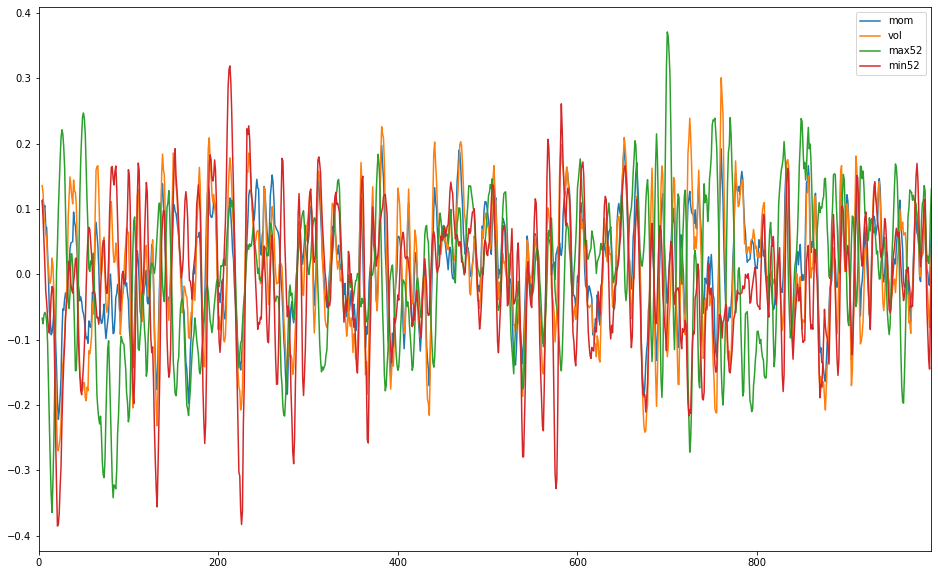

In [98]:
%matplotlib inline

rankic_df.iloc[:,1:5].rolling(5).mean().plot(figsize=(16,10))

In [19]:
np.asarray(moms[-10:]).shape

(10, 351)

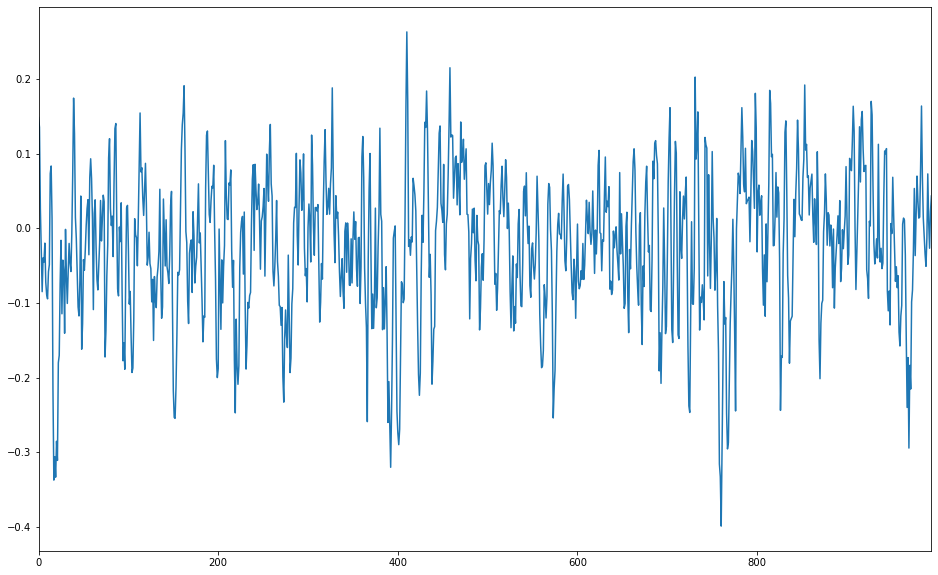

In [95]:
rankic_df['D'].plot(figsize=(16,10))

In [144]:
a = X_trains[0]

In [12]:
X_trains = []
y_trains = []
for i in range(700):
    # X_trains.append(np.asarray([moms[-(1000-i)],vols[-(1000-i)],max52s[-(1000-i)],min52s[-(1000-i)],ccis[-(1000-i)],Ks[-(1000-i)],Ds[-(1000-i)],Js[-(1000-i)],rsis[-(1000-i)],trixs[-(1000-i)],willrs[-(1000-i)],macds[-(1000-i)],natrs[-(1000-i)]]).T)
    # y_trains.append(rts[-(1000-i)])
    X_trains.append(np.asarray([avgs[-(1000-i)],moms[-(1000-i)],max52s[-(1000-i)],ccis[-(1000-i)],Ks[-(1000-i)],Ds[-(1000-i)],Js[-(1000-i)],rsis[-(1000-i)],trixs[-(1000-i)],willrs[-(1000-i)]]).T)
    y_trains.append(rts[-(1000-i)])

In [13]:
X_trainbt = []
y_trainbt = []
for i in range(0,700,5):
    # X_trainbt.append(np.asarray([moms[-(1000-i)],vols[-(1000-i)],max52s[-(1000-i)],min52s[-(1000-i)],ccis[-(1000-i)],Ks[-(1000-i)],Ds[-(1000-i)],Js[-(1000-i)],rsis[-(1000-i)],trixs[-(1000-i)],willrs[-(1000-i)],macds[-(1000-i)],natrs[-(1000-i)]]).T)
    X_trainbt.append(np.asarray([avgs[-(1000-i)],moms[-(1000-i)],max52s[-(1000-i)],ccis[-(1000-i)],Ks[-(1000-i)],Ds[-(1000-i)],Js[-(1000-i)],rsis[-(1000-i)],trixs[-(1000-i)],willrs[-(1000-i)]]).T)
    y_trainbt.append(rts[-(1000-i)])

In [14]:
X_tests = []
y_tests = []
for i in range(700,995,5):
    # X_tests.append(np.asarray([moms[-(1000-i)],vols[-(1000-i)],max52s[-(1000-i)],min52s[-(1000-i)],ccis[-(1000-i)],Ks[-(1000-i)],Ds[-(1000-i)],Js[-(1000-i)],rsis[-(1000-i)],trixs[-(1000-i)],willrs[-(1000-i)],macds[-(1000-i)],natrs[-(1000-i)]]).T)
    # y_tests.append(rts[-(1000-i)])
    X_tests.append(np.asarray([avgs[-(1000-i)],moms[-(1000-i)],max52s[-(1000-i)],ccis[-(1000-i)],Ks[-(1000-i)],Ds[-(1000-i)],Js[-(1000-i)],rsis[-(1000-i)],trixs[-(1000-i)],willrs[-(1000-i)]]).T)
    y_tests.append(rts[-(1000-i)])

In [129]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import backend as K

In [12]:
# i = 0
# for i,x in enumerate(zip(X_trains,y_trains)):
#     X_train,y_train = x[0],x[1]
#     model.fit(X_train,y_train,epochs=10,verbose=0)
#     print(i)

In [22]:
X_trainbt[0].shape

(351, 10)

In [24]:
len(X_trainbt)

140

In [23]:
y_trainbt[0].shape

(351,)

In [26]:
X_train_big.shape

(245700, 10)

In [28]:
X_trains[0].shape

(351, 10)

In [30]:
y_trains[0].shape

(351,)

In [15]:
X_train_big = np.concatenate(X_trains)
# X_train_IC = np.concatenate([X_train_big,-X_train_big],axis=1)
y_train_big = np.concatenate(y_trains)

In [32]:
X_train_big.shape

(245700, 10)

In [83]:
%matplotlib inline
import matplotlib.pylab as plt

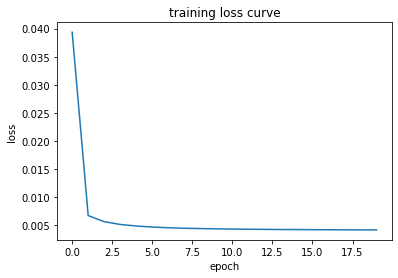

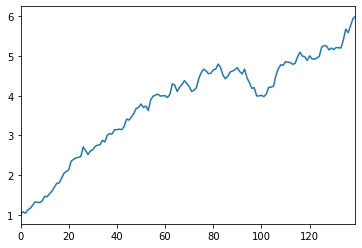

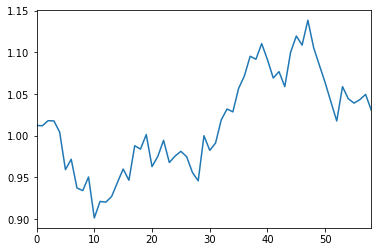

In [125]:
model = Sequential()
model.add(Dense(128,activation='tanh'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='tanh'))
# model.add(Dropout(0.1))
model.add(Dense(16,activation='tanh'))
# model.add(Dense(8,activation='tanh'))
# model.add(Dense(1,activation='tanh'))
model.add(Dense(1))

opt = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt,loss='mse')

rs = model.fit(X_train_big,y_train_big,epochs=20,batch_size=2048,verbose=0,)
plt.close()
plt.plot(rs.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training loss curve')
plt.show()

profits = []
for i,x in enumerate(zip(X_trainbt,y_trainbt)):
    X_test,y_test = x[0],x[1]
    
    pred = pd.Series(model.predict(X_test).flatten())
    # pred = pd.Series(model.predict(np.concatenate([X_test,-X_test],axis=1)).flatten())
    # pred = pred * np.exp(- pred * pred / 4) / 0.89
    head = pred.nlargest(10).index.tolist()
    tail = pred.nsmallest(10).index.tolist()
    profit = y_test[head].mean() - y_test[tail].mean()
    profits.append(profit)
pd.Series(np.asarray(profits)+1).cumprod().plot()
plt.show()
profits = []
for i,x in enumerate(zip(X_tests,y_tests)):
    X_test,y_test = x[0],x[1]
    pred = pd.Series(model.predict(X_test).flatten())
    # pred = pd.Series(model.predict(np.concatenate([X_test,-X_test],axis=1)).flatten())
    # pred = pred * np.exp(- pred * pred / 4) / 0.89
    head = pred.nlargest(10).index.tolist()
    tail = pred.nsmallest(10).index.tolist()
    profit = y_test[head].mean() - y_test[tail].mean()
    profits.append(profit)
pd.Series(np.asarray(profits)+1).cumprod().plot()
plt.show()

In [105]:
model.save('dnn_overfit3.h5')

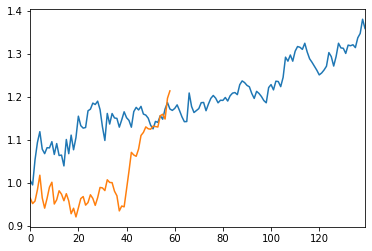

In [93]:
profits = []
for i,x in enumerate(zip(X_trainbt,y_trainbt)):
    X_test,y_test = x[0],x[1]
    
    pred = pd.Series(model.predict(X_test).flatten())
    # pred = pd.Series(model.predict(np.concatenate([X_test,-X_test],axis=1)).flatten())
    # pred = pred * np.exp(- pred * pred / 4) / 0.89
    head = pred.nlargest(20).index.tolist()
    tail = pred.nsmallest(20).index.tolist()
    profit = y_test[head].mean() - y_test[tail].mean()
    profits.append(profit)
pd.Series(np.asarray(profits)+1).cumprod().plot()

profits = []
for i,x in enumerate(zip(X_tests,y_tests)):
    X_test,y_test = x[0],x[1]
    pred = pd.Series(model.predict(X_test).flatten())
    # pred = pd.Series(model.predict(np.concatenate([X_test,-X_test],axis=1)).flatten())
    # pred = pred * np.exp(- pred * pred / 4) / 0.89
    head = pred.nlargest(10).index.tolist()
    tail = pred.nsmallest(10).index.tolist()
    profit = y_test[head].mean() - y_test[tail].mean()
    profits.append(profit)
pd.Series(np.asarray(profits)+1).cumprod().plot()

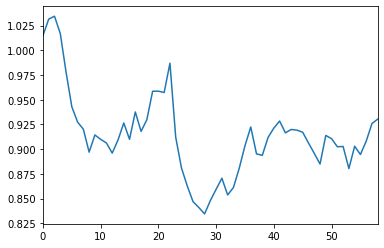

In [245]:
dfbig = pd.DataFrame(X_train_big,columns=['mom', 'vol', 'max52', 'min52', 'cci', 'K', 'D', 'J', 'rsi', 'trix', 'willr', 'macd', 'natr'])
dfbig['return'] = y_train_big

In [247]:
dfbig.shape

(210600, 14)

In [246]:
dfbig.corr()

,mom,vol,max52,min52,cci,K,D,J,rsi,trix,willr,macd,natr,return
mom,1.000000,0.706726,0.145020,-0.035348,0.001028,0.035458,0.037787,0.030439,-0.123292,0.011683,-0.034881,0.236559,-0.134893,-0.018100
vol,0.706726,1.000000,0.043973,0.013384,0.000999,0.035090,0.030973,0.014128,-0.142054,0.021882,-0.037128,0.185100,0.017966,-0.009684
max52,0.145020,0.043973,1.000000,0.219418,0.002936,0.204195,0.206021,0.144658,-0.103505,0.262442,-0.234659,0.135624,-0.495383,-0.077082
min52,-0.035348,0.013384,0.219418,1.000000,0.001405,0.125109,0.129526,0.095004,-0.085662,0.265999,-0.136034,0.087170,0.206705,0.008084
cci,0.001028,0.000999,0.002936,0.001405,1.000000,0.003887,0.004239,0.003506,0.001610,0.000403,0.003120,0.000240,0.002597,-0.000341
K,0.035458,0.035090,0.204195,0.125109,0.003887,1.000000,0.925247,0.521239,-0.059760,0.223833,-0.825920,0.243558,-0.066538,-0.032020
D,0.037787,0.030973,0.206021,0.129526,0.004239,0.925247,1.000000,0.801758,-0.068253,0.301328,-0.736382,0.285934,-0.059358,-0.030542
J,0.030439,0.014128,0.144658,0.095004,0.003506,0.521239,0.801758,1.000000,-0.056311,0.332643,-0.365430,0.265775,-0.034530,-0.018350
rsi,-0.123292,-0.142054,-0.103505,-0.085662,0.001610,-0.059760,-0.068253,-0.056311,1.000000,-0.043226,0.058660,-0.045977,-0.092770,0.008233
trix,0.011683,0.021882,0.262442,0.265999,0.000403,0.223833,0.301328,0.332643,-0.043226,1.000000,-0.290770,0.371504,-0.067648,-0.025058


In [248]:
import shap

# load your data here, e.g. X and y
# create and fit your model here

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.DeepExplainer(model,X_train_big)

In [257]:
np.concatenate(X_tests).shape

(27729, 13)

In [255]:
shap_values = explainer.shap_values(np.concatenate(X_tests)[:100])

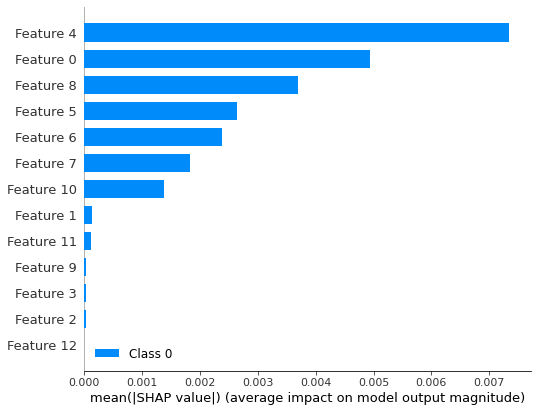

In [256]:
fig = shap.summary_plot(shap_values, np.concatenate(X_tests)[:100], plot_type="bar")

In [240]:
model.save('my_dnn2.h5')

In [128]:

pred = pd.Series(model.predict(X_tests[i]).flatten())
head = pred.nlargest(10).index.tolist()
tail = pred.nsmallest(10).index.tolist()
profit = y_tests[i][head].mean() - y_tests[i][tail].mean()

0.010839333583757604

In [101]:
np.asarray([moms[-(1000-i)],vols[-(1000-i)],max52s[-(1000-i)],min52s[-(1000-i)],ccis[-(1000-i)],Ks[-(1000-i)],Ds[-(1000-i)],Js[-(1000-i)],rsis[-(1000-i)],trixs[-(1000-i)],willrs[-(1000-i)],macds[-(1000-i)],natrs[-(1000-i)]]).T.shape

(351, 13)

In [99]:
rankic_df.columns

Index(['time', 'mom', 'vol', 'max52', 'min52', 'cci', 'K', 'D', 'J', 'rsi',
       'trix', 'willr', 'macd', 'natr'],
      dtype='object')